# Assingment Clustering - Airlines Data Set 

### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

### Draw the inferences from the clusters obtained.

## ======================================================================== 

# 1. Data Description - 

### The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

#### ID --Unique ID

#### Balance--Number of miles eligible for award travel

#### Qual_mile--Number of miles counted as qualifying for Topflight status

#### cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
#### cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
#### cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

#### 1 = under 5,000
#### 2 = 5,000 - 10,000
#### 3 = 10,001 - 25,000
#### 4 = 25,001 - 50,000
#### 5 = over 50,000

#### Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

#### Bonus_trans--Number of non-flight bonus transactions in the past 12 months

#### Flight_miles_12mo--Number of flight miles in the past 12 months

#### Flight_trans_12--Number of flight transactions in the past 12 months

#### Days_since_enrolled--Number of days since enrolled in flier program

#### Award--whether that person had award flight (free flight) or not


# 2. Import Neccessery Libraries -  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 3. Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 4. Import Data Set -  

In [3]:
airlines_data = pd.read_excel('EastWestAirlines.xlsx')
airlines_data.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [4]:
airlines_data = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# 5. EDA -  

In [5]:
airlines_data.shape

(3999, 12)

In [6]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airlines_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [9]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
airlines_data.duplicated().sum()

0

In [13]:
airlines_data.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

# 6. Data Visualization -  

In [14]:
#Correaltion Matrix
airlines_data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


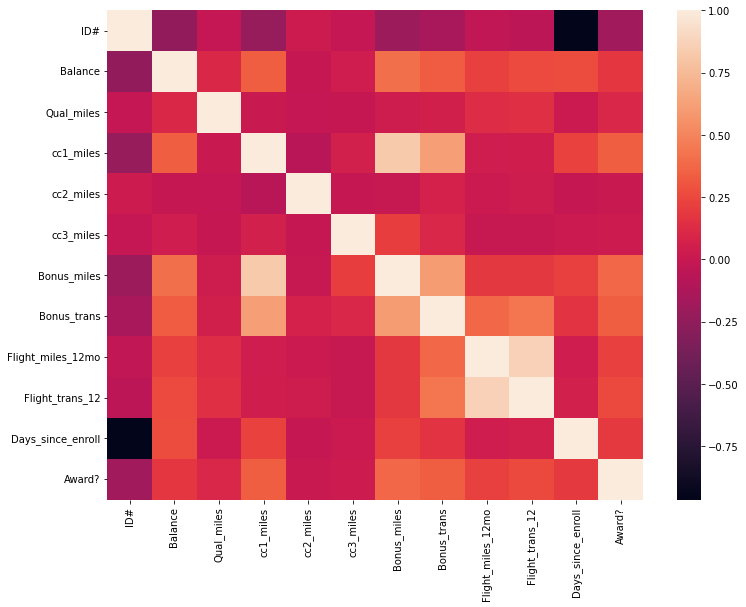

In [18]:
plt.figure(figsize=(12,9))
sns.heatmap(airlines_data.corr())
plt.show()

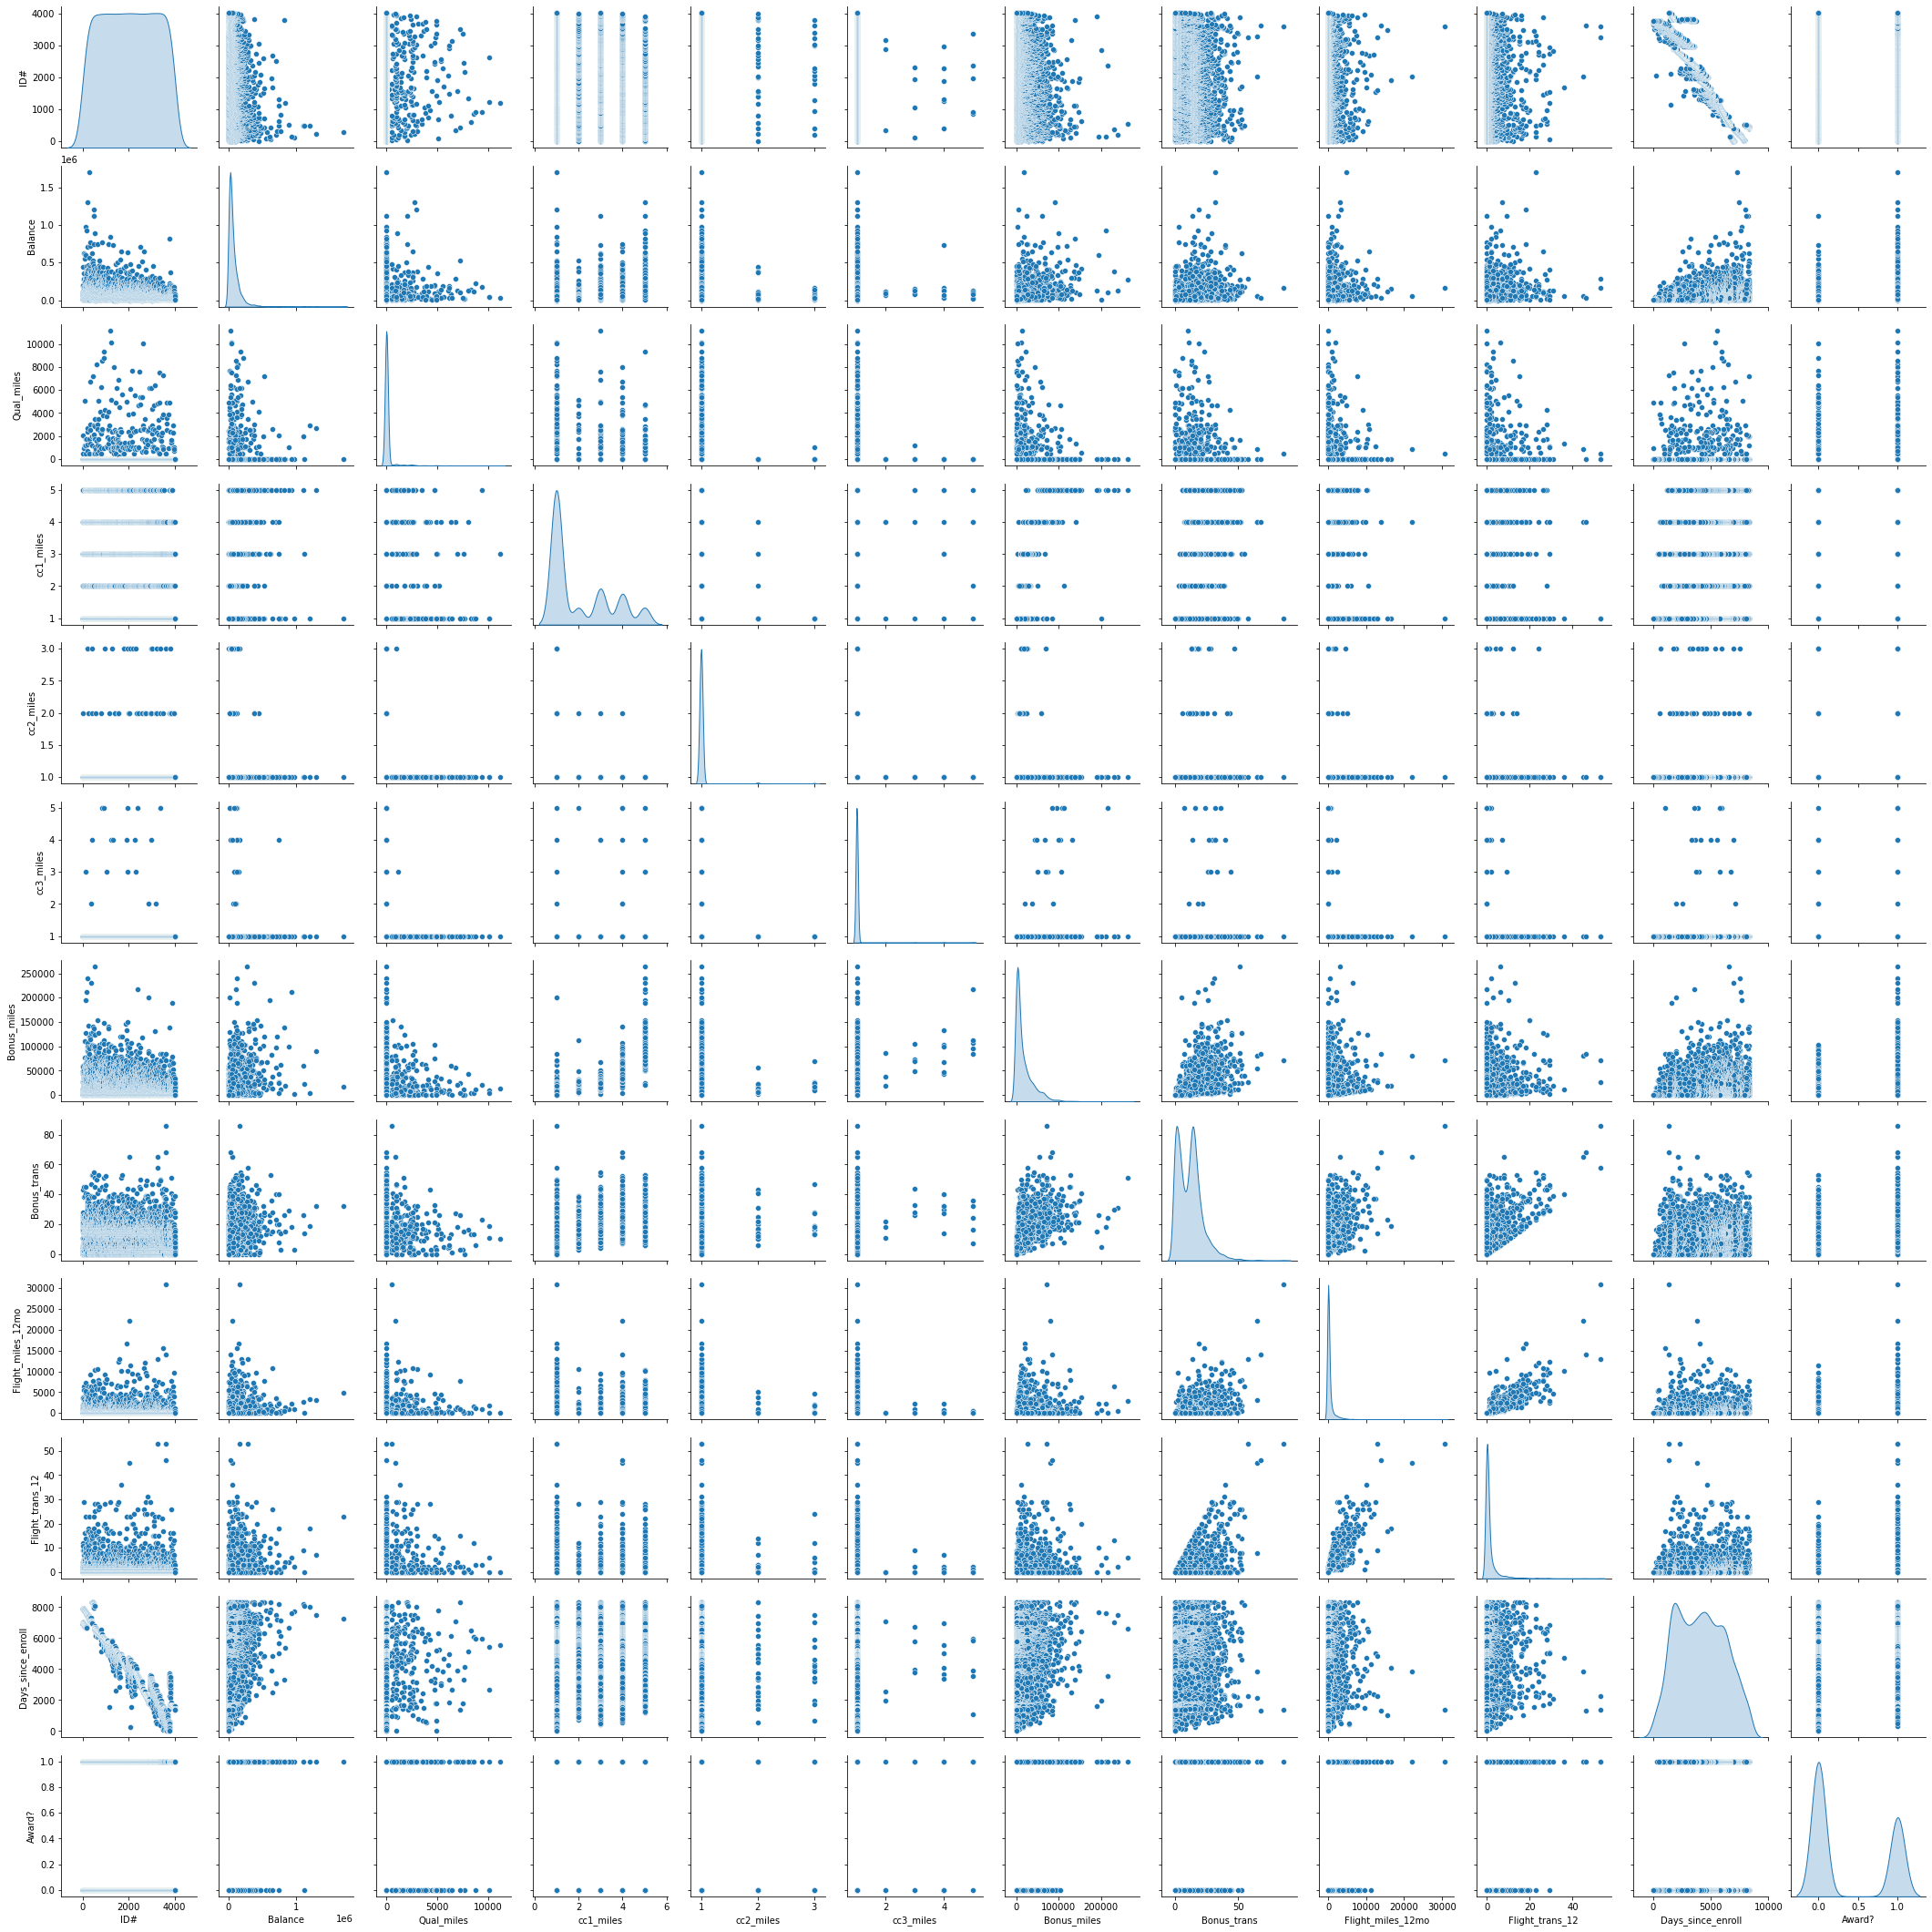

In [19]:
sns.pairplot(airlines_data,diag_kind="kde")

# 7. Data Preparation -  

In [20]:
airlines_data.drop('ID#', axis = 1,inplace=True)
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [21]:
scalar = MinMaxScaler()
scalar=scalar.fit_transform(airlines_data)

In [22]:
scaled_data = pd.DataFrame(scalar,columns=airlines_data.columns)
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# 8. CLUSTERING - 

# Hierarchical Clustering 

### Single Linkage method 

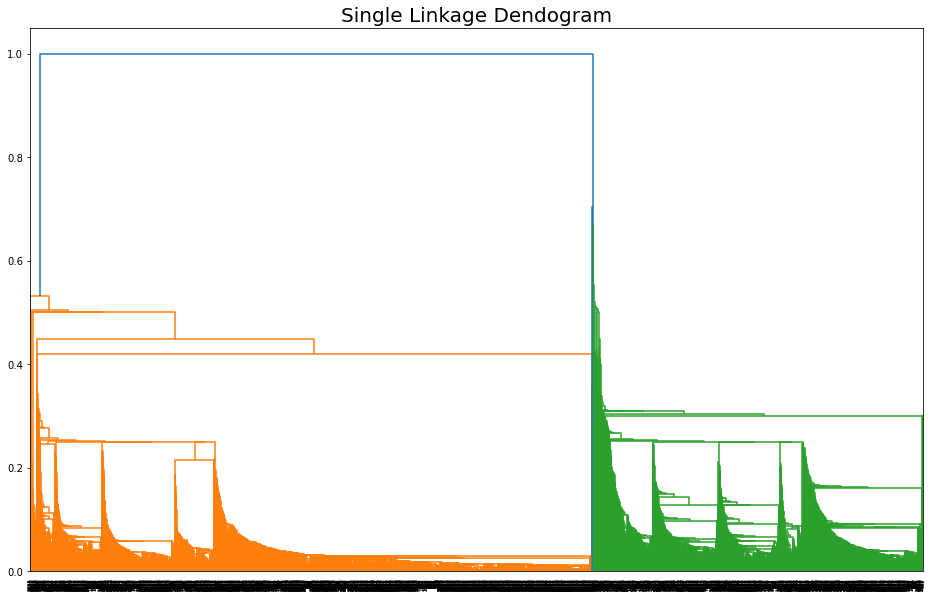

In [49]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20);

In [50]:
hc_single = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
hc_single

AgglomerativeClustering(linkage='single', n_clusters=3)

In [51]:
y_hc_single = hc_single.fit_predict(scaled_data)

In [52]:
airlines_data['Cluster'] = y_hc_single
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [53]:
airlines_data['Cluster'].value_counts()

1    2518
0    1480
2       1
Name: Cluster, dtype: int64

### Method : Complete  

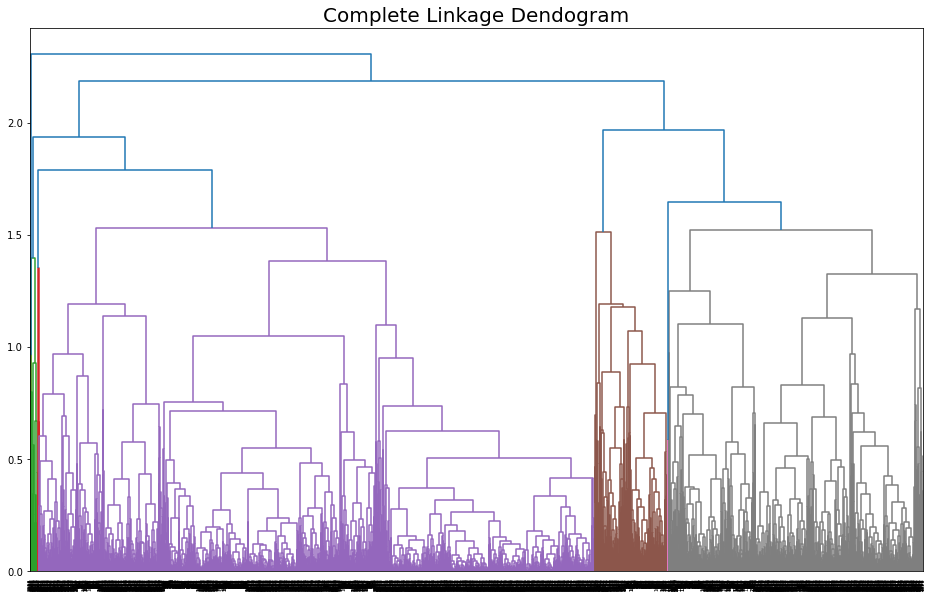

In [33]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20);

In [34]:
hc_complete = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')
hc_complete

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [35]:
y_hc_complete = hc_complete.fit_predict(scaled_data)

In [36]:
airlines_data['Cluster'] = y_hc_complete
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [37]:
airlines_data['Cluster'].value_counts()

2    2491
0    1144
1     325
4      31
5       4
3       4
Name: Cluster, dtype: int64

### Method : Average 

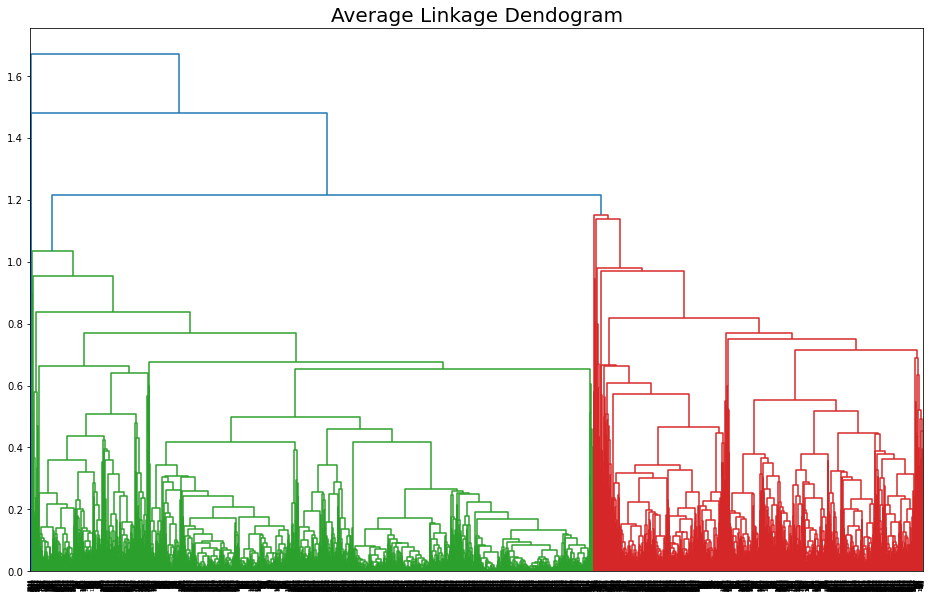

In [38]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20);

In [39]:
hc_ave= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')
hc_ave

AgglomerativeClustering(linkage='average', n_clusters=5)

In [40]:
y_hc_ave = hc_ave.fit_predict(scaled_data)

In [42]:
airlines_data['Cluster'] = y_hc_ave
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [43]:
airlines_data['Cluster'].value_counts()

1    2518
0    1468
4       8
3       4
2       1
Name: Cluster, dtype: int64

### Ward Linkage Method 

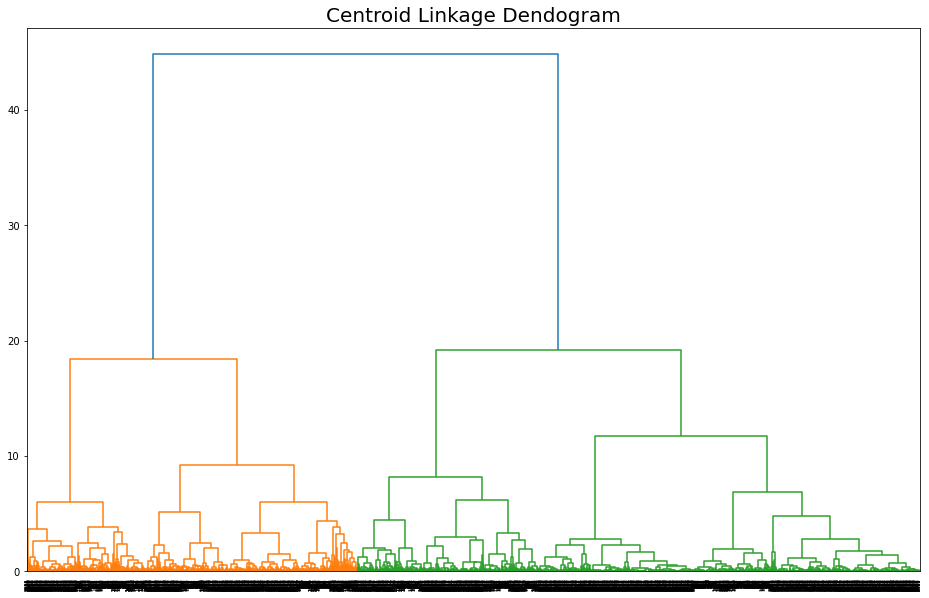

In [44]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 20);

In [45]:
hc_ward= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc_ward

AgglomerativeClustering(n_clusters=5)

In [46]:
y_hc_ward = hc_ward.fit_predict(scaled_data)

In [47]:
airlines_data['Cluster'] = y_hc_ward
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [48]:
airlines_data['Cluster'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: Cluster, dtype: int64

# K-Means Clustering -  

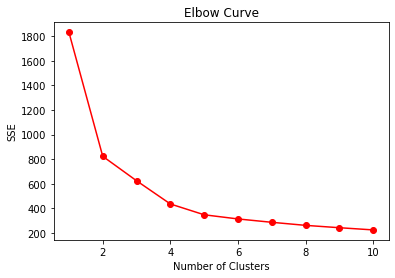

In [54]:
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 13)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse, 'bo-', color = 'r')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

**From the above Elbow Curve we can say that we get 5 clusters.** 

In [55]:
k_means = KMeans(5, random_state = 42)
k_means.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [56]:
pred_kmeans=k_means.fit_predict(scaled_data)

In [57]:
airlines_data['Cluster'] = pred_kmeans
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [58]:
airlines_data['Cluster'].value_counts()

4    1032
1     868
0     808
2     673
3     618
Name: Cluster, dtype: int64

# DBSCAN Clustering 

In [61]:
dbscan = DBSCAN(eps = 0.9, min_samples = 5)
dbscan.fit(scaled_data)

DBSCAN(eps=0.9)

In [62]:
db_pred=dbscan.fit_predict(scaled_data)

In [63]:
airlines_data['Cluster'] = db_pred
airlines_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


## Evaluating Clustering methods with the help of Silhouette Score 

In [64]:
silhouette_SLM = (metrics.silhouette_score(scaled_data,y_hc_single))
silhouette_SLM

0.5351606918177733

In [65]:
silhouette_CLM = (metrics.silhouette_score(scaled_data,y_hc_complete))
silhouette_CLM

0.4172318835123988

In [66]:
silhouette_ALM = (metrics.silhouette_score(scaled_data,y_hc_ave))
silhouette_ALM

0.5082555071160846

In [67]:
silhouette_CenLM = (metrics.silhouette_score(scaled_data,y_hc_ward))
silhouette_CenLM

0.3762586351398372

In [68]:
silhouette_KMeans = (metrics.silhouette_score(scaled_data,pred_kmeans))
silhouette_KMeans

0.4430672072796034

In [69]:
silhouette_DBSCAN = (metrics.silhouette_score(scaled_data,db_pred))
silhouette_DBSCAN

0.535930510919477

In [70]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage',
                                'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 
          'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM,
                                silhouette_KMeans, silhouette_DBSCAN]
        }
table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.535161
1,HC Complete Linkage,0.417232
2,HC Average Linkage,0.508256
3,HC Centroid Linkage,0.376259
4,KMeans,0.443067
5,DBSCAN,0.535931


# CONCLUSION 

### From this we can say that hierarchical clustering and DBScan has the best silhoutte score 